## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pip install Sastrawi

Note: you may need to restart the kernel to use updated packages.


## Importing the dataset

In [3]:
dataset = pd.read_excel(r'D:\School\Materi dan Tugas Kuliah\S2\Tesis\Dataset\Berita\Master Data File Sorted Columns.xlsx')

In [4]:
dataset.head()

,Date,Reviews,Index
0,2020-07-06 09:03:32,"Corona RI 6 Juli, Kasus Positif Naik 1.209 Tem...",NEG
1,2020-07-06 09:07:34,"Dibantu China, Rupiah Akhirnya Kuat Lagi Usai ...",POS
2,2020-07-06 09:10:32,Bukti Startup Asia Masih Seksi di Mata Investo...,POS
3,2020-07-06 09:14:33,"Ramai-Ramai Orang Mendadak Jadi Pedagang, Tand...",NEU
4,2020-07-06 09:19:35,"Terancam Delisting, Emiten Tambang Sinarmas Si...",NEU


In [5]:
dataset['Index'].count

<bound method Series.count of 0        NEG
1        POS
2        POS
3        NEU
4        NEU
        ... 
33985    NEG
33986    NEU
33987    NEU
33988    POS
33989    POS
Name: Index, Length: 33990, dtype: object>

## Cleaning the texts

In [6]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
corpus = []
for i in range (0, 33990):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Reviews'][i])
    review = review.lower()
    review = review.split()
    sf = StemmerFactory()
    stemmer = sf.create_stemmer()
    all_stopwords = stopwords.words('indonesian')
    review = [stemmer.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to C:\Users\Ervandio
[nltk_data]     Irzky\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
print(corpus)

['corona ri juli positif tembus', 'bantu china rupiah kuat ko', 'bukti startup asia seksi mata investor asing', 'ramai ramai orang dadak dagang tanda', 'ancam delisting emiten tambang sinarmas rights issue', 'hore orang sembuh sakit covid ri', 'update corona ri juli positif sembuh', 'jokowi turun gas rumah kaca', 'duh covid ri lipat ganda bulan', 'data guna e commerce bocor bukti ri rawan cybercrime', 'perry sepakat burden sharing sri mulyani', 'rencana mobil motor kena cukai kabar', 'rencana mobil motor kena cukai kabar', 'reli bursa asia lanjut bursa china lompat', 'pgn bangun jaring gas rumah tangga juni', 'janji menteri johnny plate cepat digitalisasi televisi', 'lolos hukum mati pulang etty sambut menaker ida', 'bu khofifah aktif covid jatim kali lipat dki', 'heboh lobster edhy prabowo beking anggota dpr', 'new normal konsumsi avtur sumatera utara', 'duh pria tangkap polisi china gegara kritik xi jinping', 'tren koreksi rupiah henti laju kencang pekan', 'bright gas bangkit umkm pu

## Creating the Bag of Words model

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 6708)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

In [9]:
len(X[0])

6708

In [27]:
X.shape

(33990, 6708)

In [28]:
y.shape

(33990,)

## Splitting the dataset into the Training set and Test set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Training the Naive Bayes model on the Training set

In [13]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion = 'entropy')
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

## Predicting the Test set results

In [14]:
y_pred = classifier.predict(X_test)
y_pred_prob = classifier.predict_proba(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['NEU' 'NEU']
 ['POS' 'POS']
 ['NEU' 'NEU']
 ...
 ['NEU' 'NEU']
 ['NEU' 'NEU']
 ['NEU' 'POS']]


In [15]:
print(y_pred_prob)

[[0.03 0.9  0.07]
 [0.02 0.37 0.61]
 [0.   1.   0.  ]
 ...
 [0.22 0.76 0.02]
 [0.11 0.89 0.  ]
 [0.22 0.45 0.33]]


## Making the Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 514  257   92]
 [  97 4711  104]
 [  58  314  651]]


0.8643718740806119

In [17]:
print(X_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Performance Evaluation

Accuracy: 0.86
Auc: 0.94
Detail:
              precision    recall  f1-score   support

         NEG       0.77      0.60      0.67       863
         NEU       0.89      0.96      0.92      4912
         POS       0.77      0.64      0.70      1023

    accuracy                           0.86      6798
   macro avg       0.81      0.73      0.76      6798
weighted avg       0.86      0.86      0.86      6798



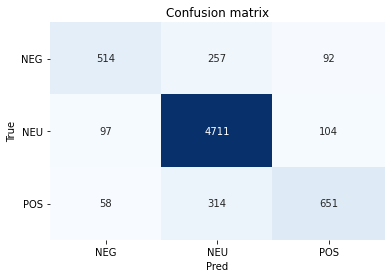

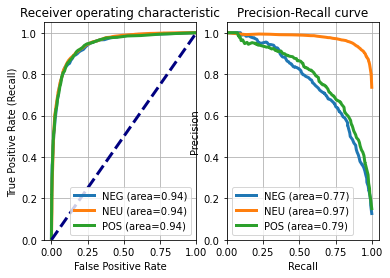

In [18]:
classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
## Accuracy, Precision, Recall
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred_prob, multi_class="ovr")
print("Accuracy:",  round(accuracy,2))
print("Auc:", round(auc,2))
print("Detail:")
print(metrics.classification_report(y_test, y_pred))
    
## Plot confusion matrix
import seaborn as sns
cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

fig, ax = plt.subplots(nrows=1, ncols=2)
## Plot roc
for i in range(len(classes)):
    fpr, tpr, thresholds = metrics.roc_curve(y_test_array[:,i],  
                           y_pred_prob[:,i])
    ax[0].plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              metrics.auc(fpr, tpr))
               )
ax[0].plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
ax[0].set(xlim=[-0.05,1.0], ylim=[0.0,1.05], 
          xlabel='False Positive Rate', 
          ylabel="True Positive Rate (Recall)", 
          title="Receiver operating characteristic")
ax[0].legend(loc="lower right")
ax[0].grid(True)
    
## Plot precision-recall curve
for i in range(len(classes)):
    precision, recall, thresholds = metrics.precision_recall_curve(
                 y_test_array[:,i], y_pred_prob[:,i])
    ax[1].plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  metrics.auc(recall, precision))
              )
ax[1].set(xlim=[0.0,1.05], ylim=[0.0,1.05], xlabel='Recall', 
          ylabel="Precision", title="Precision-Recall curve")
ax[1].legend(loc="best")
ax[1].grid(True)
plt.show()

## Validation

In [19]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.83 (+/- 0.04)


### K-Fold Validation

In [ ]:
from sklearn.model_selection import KFold
acc_score = []

kf = KFold(n_splits=5)

for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  classifier.fit(X_train,y_train)
  predictions = classifier.predict(X_test)
  acc_score.append(accuracy_score(predictions, y_test))

np.mean(acc_score)

### Graph Validation

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

>1, train: 0.969, test: 0.766
>2, train: 0.864, test: 0.741
>3, train: 0.890, test: 0.780
>4, train: 0.856, test: 0.762
>5, train: 0.862, test: 0.769
>6, train: 0.838, test: 0.767
>7, train: 0.846, test: 0.784
>8, train: 0.832, test: 0.772
>9, train: 0.841, test: 0.779
>10, train: 0.834, test: 0.773
>11, train: 0.840, test: 0.782
>12, train: 0.832, test: 0.771
>13, train: 0.836, test: 0.776
>14, train: 0.825, test: 0.772
>15, train: 0.828, test: 0.786
>16, train: 0.823, test: 0.782
>17, train: 0.827, test: 0.788
>18, train: 0.820, test: 0.784
>19, train: 0.823, test: 0.788
>20, train: 0.821, test: 0.781
>21, train: 0.822, test: 0.778
>22, train: 0.817, test: 0.777
>23, train: 0.818, test: 0.780
>24, train: 0.813, test: 0.778
>25, train: 0.816, test: 0.783
>26, train: 0.814, test: 0.779
>27, train: 0.815, test: 0.785
>28, train: 0.812, test: 0.780
>29, train: 0.815, test: 0.785
>30, train: 0.811, test: 0.783
>31, train: 0.812, test: 0.787
>32, train: 0.810, test: 0.781
>33, train: 0.811

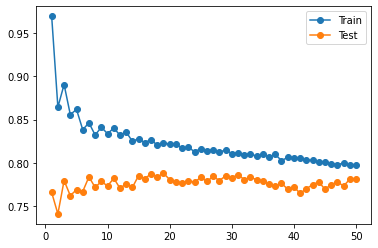

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 51)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = KNeighborsClassifier(n_neighbors=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

## Test

### Predict & Merge Full Data

In [29]:
y_uji = classifier.predict(X)
y_uji_prob = classifier.predict_proba(X)
print(np.concatenate((y_uji.reshape(len(y_uji),1), y.reshape(len(y),1)),1))

[['NEG' 'NEG']
 ['POS' 'POS']
 ['NEU' 'POS']
 ...
 ['NEU' 'NEU']
 ['POS' 'POS']
 ['POS' 'POS']]


In [30]:
cm_uji = confusion_matrix(y, y_uji)
print(cm_uji)
accuracy_score(y, y_uji)

[[ 4067   263   101]
 [   98 24295   108]
 [   60   366  4632]]


0.9706972639011474

In [31]:
dataset['y_uji'] = y_uji

In [32]:
dataset.head()

,Date,Reviews,Index,y_uji
0,2020-07-06 09:03:32,"Corona RI 6 Juli, Kasus Positif Naik 1.209 Tem...",NEG,NEG
1,2020-07-06 09:07:34,"Dibantu China, Rupiah Akhirnya Kuat Lagi Usai ...",POS,POS
2,2020-07-06 09:10:32,Bukti Startup Asia Masih Seksi di Mata Investo...,POS,NEU
3,2020-07-06 09:14:33,"Ramai-Ramai Orang Mendadak Jadi Pedagang, Tand...",NEU,NEU
4,2020-07-06 09:19:35,"Terancam Delisting, Emiten Tambang Sinarmas Si...",NEU,NEU


### Group & Count Data

In [34]:
dataset['Date'] = pd.to_datetime(dataset['Date'], format = '%Y-%m-%d %H:%M:%S', errors = 'coerce')

In [36]:
assert dataset.Date.isnull().sum() == 0, "missing 'Date' dates"

In [37]:
dataset['Date'] = dataset['Date'] + pd.Timedelta('7h')

In [38]:
dataset.head()

,Date,Reviews,Index,y_uji
0,2020-07-06 16:03:32,"Corona RI 6 Juli, Kasus Positif Naik 1.209 Tem...",NEG,NEG
1,2020-07-06 16:07:34,"Dibantu China, Rupiah Akhirnya Kuat Lagi Usai ...",POS,POS
2,2020-07-06 16:10:32,Bukti Startup Asia Masih Seksi di Mata Investo...,POS,NEU
3,2020-07-06 16:14:33,"Ramai-Ramai Orang Mendadak Jadi Pedagang, Tand...",NEU,NEU
4,2020-07-06 16:19:35,"Terancam Delisting, Emiten Tambang Sinarmas Si...",NEU,NEU


In [39]:
dataset['Date'] = dataset['Date'].dt.date

In [40]:
dataset.head()

,Date,Reviews,Index,y_uji
0,2020-07-06,"Corona RI 6 Juli, Kasus Positif Naik 1.209 Tem...",NEG,NEG
1,2020-07-06,"Dibantu China, Rupiah Akhirnya Kuat Lagi Usai ...",POS,POS
2,2020-07-06,Bukti Startup Asia Masih Seksi di Mata Investo...,POS,NEU
3,2020-07-06,"Ramai-Ramai Orang Mendadak Jadi Pedagang, Tand...",NEU,NEU
4,2020-07-06,"Terancam Delisting, Emiten Tambang Sinarmas Si...",NEU,NEU


In [41]:
dataset.groupby('Date').size()

Date
2020-07-06     67
2020-07-07    233
2020-07-08    228
2020-07-09    228
2020-07-10    196
             ... 
2021-01-06    249
2021-01-07    250
2021-01-08    228
2021-01-09     87
2021-01-10     74
Length: 177, dtype: int64

In [62]:
df_count = dataset.groupby(['Date','y_uji']).count()

In [63]:
df_count

Reviews  Index
Date       y_uji                
2020-07-06 NEG         11     11
           NEU         46     46
           POS         10     10
2020-07-07 NEG         26     26
           NEU        144    144
...                   ...    ...
2021-01-09 NEU         60     60
           POS          7      7
2021-01-10 NEG         13     13
           NEU         59     59
           POS          2      2

[530 rows x 2 columns]

In [58]:
pd.set_option('display.max_rows', 500)

In [61]:
dataset.head(n=67)

,Date,Reviews,Index,y_uji
0,2020-07-06,"Corona RI 6 Juli, Kasus Positif Naik 1.209 Tem...",NEG,NEG
1,2020-07-06,"Dibantu China, Rupiah Akhirnya Kuat Lagi Usai ...",POS,POS
2,2020-07-06,Bukti Startup Asia Masih Seksi di Mata Investo...,POS,NEU
3,2020-07-06,"Ramai-Ramai Orang Mendadak Jadi Pedagang, Tand...",NEU,NEU
4,2020-07-06,"Terancam Delisting, Emiten Tambang Sinarmas Si...",NEU,NEU
5,2020-07-06,Hore Hampir 30.000 Orang Sembuh dari Penyakit ...,POS,POS
6,2020-07-06,"Update Corona RI per 6 Juli 64.958 Positif, 29...",NEG,NEG
7,2020-07-06,Jokowi Mau Turunkan Gas Rumah Kaca Sebanyak 20...,NEU,NEU
8,2020-07-06,Duh Kasus Covid-19 RI Berlipat Ganda dalam Seb...,NEG,NEG
9,2020-07-06,"Data Pengguna E-Commerce Bocor, Ini Bukti RI R...",NEG,NEG


In [66]:
df_count.to_excel(r'D:\School\Materi dan Tugas Kuliah\S2\Tesis\Dataset\Berita\Sentiment Analysis.xlsx')